In [186]:
import pandas as pd
import numpy as np
import os
import math
from math import sqrt
import datetime
from datetime import date
import matplotlib.pyplot as plt

In [187]:
field = 'ROBOT'
input_string = 'C:/Users/Simon/QGIS/QGIS_robot'
os.chdir(input_string)
directory = sorted(os.listdir(input_string))
print(directory)

['robot_p4m_210528.xlsx', 'robot_p4m_210602.xlsx', 'robot_p4m_210604.xlsx', 'robot_p4m_210611.xlsx', 'robot_p4m_210615.xlsx', 'robot_p4m_210617.xlsx', 'robot_p4m_210623.xlsx', 'robot_p4m_210624.xlsx', 'robot_p4m_210630.xlsx', 'robot_p4m_210701.xlsx', 'robot_p4m_210702.xlsx', 'robot_p4m_210705.xlsx', 'robot_p4m_210706.xlsx', 'robot_p4m_210709.xlsx', 'robot_p4m_210713.xlsx', 'robot_p4m_210715.xlsx', 'robot_p4m_210719.xlsx', 'robot_p4m_210721_0900.xlsx', 'robot_p4m_210721_1000.xlsx', 'robot_p4m_210721_1100.xlsx', 'robot_p4m_210721_1200.xlsx', 'robot_p4m_210721_1300.xlsx', 'robot_p4m_210721_1400.xlsx', 'robot_p4m_210721_1500.xlsx', 'robot_p4m_210722.xlsx', 'robot_p4m_210726.xlsx', 'robot_p4m_210730.xlsx', 'robot_p4m_210802.xlsx', 'robot_p4m_210805.xlsx', 'robot_p4m_210812.xlsx']


In [188]:
#saving the data computed here:
data_indices_mean = []
data_indices_median = []


In [189]:
for i in directory:
    
    excel_file = i
    excel_file = pd.read_excel(i)
    
    data_indices.append(excel_file)

    
    headers = list(excel_file)

    translate_dict = {}

    for x in headers:
        y = x
        x = x.strip()
        x = x.lower()
        k = x.split('_')


        if x.startswith('bl'):
            if k[-1].startswith('mea'):
                translate_dict['blue_mean'] = y
            if k[-1].startswith('med'):
                translate_dict['blue_median'] = y
            if k[-1].startswith('s'):
                translate_dict['blue_stdev'] = y

        if x.startswith('re'):

            if 'dg' in k[-2] or 'dg' in k[0]:

                if k[-1].startswith('mea') or k[-1]=='me' or k[-1]=='m':
                    translate_dict['rededge_mean'] = y
                if k[-1].startswith('med') or k[-1]=='1':
                    translate_dict['rededge_median'] = y
                if k[-1].startswith('s'):
                    translate_dict['rededge_stdev'] = y
            else:

                if k[-1].startswith('mea'):
                    translate_dict['red_mean'] = y
                if k[-1].startswith('med'):
                    translate_dict['red_median'] = y
                if k[-1].startswith('s'):
                    translate_dict['red_stdev'] = y


        if x.startswith('gr'):
            if k[-1].startswith('mea'):
                translate_dict['green_mean'] = y
            if k[-1].startswith('med'):
                translate_dict['green_median'] = y
            if k[-1].startswith('s'):
                translate_dict['green_stdev'] = y

        if x.startswith('nd'):
            if k[-1].startswith('mea'):
                translate_dict['ndvi_mean'] = y
            if k[-1].startswith('med'):
                translate_dict['ndvi_median'] = y
            if k[-1].startswith('s'):
                translate_dict['ndvi_stdev'] = y

        if x.startswith('ni'):
            if k[-1].startswith('mea'):
                translate_dict['nir_mean'] = y
            if k[-1].startswith('med'):
                translate_dict['nir_median'] = y
            if k[-1].startswith('s'):
                translate_dict['nir_stdev'] = y
    
    print(translate_dict)
    print('--------------------------------######################-------------------------------')
    
    
    excel_file.columns
    
    excel_file_P4M_MEAN=pd.DataFrame(excel_file, columns=['id',translate_dict['blue_mean'],translate_dict['green_mean'],translate_dict['red_mean'], 
       translate_dict['rededge_mean'],  translate_dict['nir_mean'], translate_dict['ndvi_mean'], 'mtci_mean' ])
    excel_file_P4M_MEAN.rename(columns={'id':'plot',translate_dict['blue_mean']:'Blue',  translate_dict['green_mean']:'Green',  translate_dict['red_mean']:'Red', 
       translate_dict['rededge_mean']:'RedEdge',  translate_dict['nir_mean']:'NIR',translate_dict['ndvi_mean']:'NDVI', 'mtci_mean':'MTCI_CI'},inplace=True)
    
    #Math formulas
    excel_file_P4M_MEAN['DVI']=excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red']
    excel_file_P4M_MEAN['GDVI']=excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green']
    excel_file_P4M_MEAN['MTCI_CI']=(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['RedEdge'])/(excel_file_P4M_MEAN['RedEdge']-excel_file_P4M_MEAN['Red'])
    excel_file_P4M_MEAN['EXG']=(2*excel_file_P4M_MEAN['Green'])-excel_file_P4M_MEAN['Red']-excel_file_P4M_MEAN['Blue']
    excel_file_P4M_MEAN['EXGR']=(3*excel_file_P4M_MEAN['Green'])-(2.4*excel_file_P4M_MEAN['Red'])-excel_file_P4M_MEAN['Blue']
    excel_file_P4M_MEAN['RDVI']=(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red'])/np.sqrt(excel_file_P4M_MEAN[['NIR','Red']].sum(axis=1))
    excel_file_P4M_MEAN['TDVI']=1.5*(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red'])/np.sqrt((np.power(excel_file_P4M_MEAN['NIR'],2)+ excel_file_P4M_MEAN['Red']+0.5 ))
    excel_file_P4M_MEAN['GNDVI']=(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green'])/(excel_file_P4M_MEAN['NIR']+excel_file_P4M_MEAN['Green'])
    excel_file_P4M_MEAN['NDRE']=(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['RedEdge'])/(excel_file_P4M_MEAN['NIR']+excel_file_P4M_MEAN['RedEdge'])
    excel_file_P4M_MEAN['SCCI']=excel_file_P4M_MEAN['NDRE']/excel_file_P4M_MEAN['NDVI']
    excel_file_P4M_MEAN['EVI']=2.5*(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red'])/(excel_file_P4M_MEAN['NIR']-6*(excel_file_P4M_MEAN['Red'])-(7.5*excel_file_P4M_MEAN['Blue'])-1)
    excel_file_P4M_MEAN['TVI']=0.5*(120*(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green'])-200*(excel_file_P4M_MEAN['Red']-excel_file_P4M_MEAN['Green']))
    excel_file_P4M_MEAN['VARI']=(excel_file_P4M_MEAN['Green']-excel_file_P4M_MEAN['Red'])/(excel_file_P4M_MEAN['Green']+excel_file_P4M_MEAN['Red']-excel_file_P4M_MEAN['Blue'])
    excel_file_P4M_MEAN['GARI']=(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green'])-(1.7*(excel_file_P4M_MEAN['Blue']-excel_file_P4M_MEAN['Red']))/(excel_file_P4M_MEAN['NIR']+excel_file_P4M_MEAN['Green'])-(1.7*(excel_file_P4M_MEAN['Blue']-excel_file_P4M_MEAN['Red']))
    excel_file_P4M_MEAN['GCI']=(excel_file_P4M_MEAN['NIR']/excel_file_P4M_MEAN['Green'])-1
    excel_file_P4M_MEAN['GLI']=(excel_file_P4M_MEAN['Green']-excel_file_P4M_MEAN['Red']-excel_file_P4M_MEAN['Blue'])/(2*excel_file_P4M_MEAN['Green']+excel_file_P4M_MEAN['Red']+excel_file_P4M_MEAN['Blue'])
    excel_file_P4M_MEAN['NLI']=(np.power(excel_file_P4M_MEAN['NIR'],2)-excel_file_P4M_MEAN['Red'])/(np.power(excel_file_P4M_MEAN['NIR'],2)+excel_file_P4M_MEAN['Red'])
    excel_file_P4M_MEAN['MNLI']=(np.power(excel_file_P4M_MEAN['NIR'],2)-excel_file_P4M_MEAN['Red'])*1.5/(np.power(excel_file_P4M_MEAN['NIR'],2)+excel_file_P4M_MEAN['Red'] + 0.5)
    excel_file_P4M_MEAN['SAVI']= ((excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red'])*1.5)/(excel_file_P4M_MEAN['NIR']+ excel_file_P4M_MEAN['Red']+ 0.5) 
    excel_file_P4M_MEAN['GSAVI']= ((excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green'])*1.5)/(excel_file_P4M_MEAN['NIR']+ excel_file_P4M_MEAN['Green']+ 0.5)                                    
    excel_file_P4M_MEAN['OSAVI']= ((excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red']))/(excel_file_P4M_MEAN['NIR']+ excel_file_P4M_MEAN['Red']+ 0.16)
    excel_file_P4M_MEAN['GOSAVI']= ((excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Green']))/(excel_file_P4M_MEAN['NIR']+ (excel_file_P4M_MEAN['Green'])+ 0.16)
    excel_file_P4M_MEAN['MSAVI2']=(2*excel_file_P4M_MEAN['NIR'])+1-np.sqrt(np.power((2*excel_file_P4M_MEAN['NIR']+1),2)-8*(excel_file_P4M_MEAN['NIR']-excel_file_P4M_MEAN['Red']))/2
    excel_file_P4M_MEAN['MSR']=(excel_file_P4M_MEAN['NIR']/excel_file_P4M_MEAN['Red'])-(1/np.sqrt(excel_file_P4M_MEAN['NIR']/excel_file_P4M_MEAN['Red']))
    excel_file_P4M_MEAN['GRVI']=(excel_file_P4M_MEAN['NIR']/excel_file_P4M_MEAN['Green'])
    excel_file_P4M_MEAN['WDRVI']=((0.1*excel_file_P4M_MEAN['NIR'])-excel_file_P4M_MEAN['Red'])/((0.1*excel_file_P4M_MEAN['NIR'])+excel_file_P4M_MEAN['Red'])
    excel_file_P4M_MEAN['SR']=(excel_file_P4M_MEAN['NIR']/excel_file_P4M_MEAN['Red'])
    
    
    excel_file_P4M_MEDIAN=pd.DataFrame(excel_file, columns=['id',translate_dict['blue_median'],translate_dict['green_median'],translate_dict['red_median'],
      translate_dict['rededge_median'],translate_dict['nir_median'], translate_dict['ndvi_median'],'mtci_median'])
    excel_file_P4M_MEDIAN.rename(columns={'id':'plot',translate_dict['blue_median']:'Blue',translate_dict['green_median']:'Green',translate_dict['red_median']:'Red',
      translate_dict['rededge_median']:'RedEdge',translate_dict['nir_median']:'NIR', translate_dict['ndvi_median']:'NDVI','mtci_median':'MTCI_CI'}, inplace=True)
    
    excel_file_P4M_MEDIAN['DVI']=excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red']
    excel_file_P4M_MEDIAN['GDVI']=excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green']
    excel_file_P4M_MEDIAN['MTCI_CI']=(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['RedEdge'])/(excel_file_P4M_MEDIAN['RedEdge']-excel_file_P4M_MEDIAN['Red'])
    excel_file_P4M_MEDIAN['EXG']=(2*excel_file_P4M_MEDIAN['Green'])-excel_file_P4M_MEDIAN['Red']-excel_file_P4M_MEDIAN['Blue']
    excel_file_P4M_MEDIAN['EXGR']=(3*excel_file_P4M_MEDIAN['Green'])-(2.4*excel_file_P4M_MEDIAN['Red'])-excel_file_P4M_MEDIAN['Blue']


    excel_file_P4M_MEDIAN['RDVI']=(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red'])/np.sqrt(excel_file_P4M_MEDIAN[['NIR','Red']].sum(axis=1))
    excel_file_P4M_MEDIAN['TDVI']=1.5*(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red'])/np.sqrt((np.power(excel_file_P4M_MEDIAN['NIR'],2)+ excel_file_P4M_MEDIAN['Red']+0.5 ))
    excel_file_P4M_MEDIAN['GNDVI']=(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green'])/(excel_file_P4M_MEDIAN['NIR']+excel_file_P4M_MEDIAN['Green'])
    excel_file_P4M_MEDIAN['NDRE']=(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['RedEdge'])/(excel_file_P4M_MEDIAN['NIR']+excel_file_P4M_MEDIAN['RedEdge'])
    excel_file_P4M_MEDIAN['SCCI']=excel_file_P4M_MEDIAN['NDRE']/excel_file_P4M_MEDIAN['NDVI']
    excel_file_P4M_MEDIAN['EVI']=2.5*(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red'])/(excel_file_P4M_MEDIAN['NIR']-6*(excel_file_P4M_MEDIAN['Red'])-(7.5*excel_file_P4M_MEDIAN['Blue'])-1)
    excel_file_P4M_MEDIAN['TVI']=0.5*(120*(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green'])-200*(excel_file_P4M_MEDIAN['Red']-excel_file_P4M_MEDIAN['Green']))
    excel_file_P4M_MEDIAN['VARI']=(excel_file_P4M_MEDIAN['Green']-excel_file_P4M_MEDIAN['Red'])/(excel_file_P4M_MEDIAN['Green']+excel_file_P4M_MEDIAN['Red']-excel_file_P4M_MEDIAN['Blue'])
    excel_file_P4M_MEDIAN['GARI']=(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green'])-(1.7*(excel_file_P4M_MEDIAN['Blue']-excel_file_P4M_MEDIAN['Red']))/(excel_file_P4M_MEDIAN['NIR']+excel_file_P4M_MEDIAN['Green'])-(1.7*(excel_file_P4M_MEDIAN['Blue']-excel_file_P4M_MEDIAN['Red']))
    excel_file_P4M_MEDIAN['GCI']=(excel_file_P4M_MEDIAN['NIR']/excel_file_P4M_MEDIAN['Green'])-1
    excel_file_P4M_MEDIAN['GLI']=(excel_file_P4M_MEDIAN['Green']-excel_file_P4M_MEDIAN['Red']-excel_file_P4M_MEDIAN['Blue'])/(2*excel_file_P4M_MEDIAN['Green']+excel_file_P4M_MEDIAN['Red']+excel_file_P4M_MEDIAN['Blue'])
    excel_file_P4M_MEDIAN['NLI']=(np.power(excel_file_P4M_MEDIAN['NIR'],2)-excel_file_P4M_MEDIAN['Red'])/(np.power(excel_file_P4M_MEDIAN['NIR'],2)+excel_file_P4M_MEDIAN['Red'])
    excel_file_P4M_MEDIAN['MNLI']=(np.power(excel_file_P4M_MEDIAN['NIR'],2)-excel_file_P4M_MEDIAN['Red'])*1.5/(np.power(excel_file_P4M_MEDIAN['NIR'],2)+excel_file_P4M_MEDIAN['Red'] + 0.5)
    excel_file_P4M_MEDIAN['SAVI']= ((excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red'])*1.5)/(excel_file_P4M_MEDIAN['NIR']+ excel_file_P4M_MEDIAN['Red']+ 0.5) 
    excel_file_P4M_MEDIAN['GSAVI']= ((excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green'])*1.5)/(excel_file_P4M_MEDIAN['NIR']+ excel_file_P4M_MEDIAN['Green']+ 0.5)                                    
    excel_file_P4M_MEDIAN['OSAVI']= ((excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red']))/(excel_file_P4M_MEDIAN['NIR']+ excel_file_P4M_MEDIAN['Red']+ 0.16)
    excel_file_P4M_MEDIAN['GOSAVI']= ((excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Green']))/(excel_file_P4M_MEDIAN['NIR']+ (excel_file_P4M_MEDIAN['Green'])+ 0.16)
    excel_file_P4M_MEDIAN['MSAVI2']=(2*excel_file_P4M_MEDIAN['NIR'])+1-np.sqrt(np.power((2*excel_file_P4M_MEDIAN['NIR']+1),2)-8*(excel_file_P4M_MEDIAN['NIR']-excel_file_P4M_MEDIAN['Red']))/2
    excel_file_P4M_MEDIAN['MSR']=(excel_file_P4M_MEDIAN['NIR']/excel_file_P4M_MEDIAN['Red'])-(1/np.sqrt(excel_file_P4M_MEDIAN['NIR']/excel_file_P4M_MEDIAN['Red']))
    excel_file_P4M_MEDIAN['GRVI']=(excel_file_P4M_MEDIAN['NIR']/excel_file_P4M_MEDIAN['Green'])
    excel_file_P4M_MEDIAN['WDRVI']=((0.1*excel_file_P4M_MEDIAN['NIR'])-excel_file_P4M_MEDIAN['Red'])/((0.1*excel_file_P4M_MEDIAN['NIR'])+excel_file_P4M_MEDIAN['Red'])
    excel_file_P4M_MEDIAN['SR']=(excel_file_P4M_MEDIAN['NIR']/excel_file_P4M_MEDIAN['Red'])

    
    list_excel_string_name = i.split('_')
    date_str = list_excel_string_name[2]
    updated_date_str = '20{}{}-{}{}-{}{}'.format(date_str[0],date_str[1],date_str[2],date_str[3],date_str[4],date_str[5])
    len(list_excel_string_name)
    if len(list_excel_string_name) > 3:
        date_str = list_excel_string_name[2] + '_' + list_excel_string_name[3]
    
    
    excel_file_P4M_MEDIAN['Time']=pd.to_datetime(updated_date_str.replace("'",""))
    excel_file_P4M_MEAN['Time']=pd.to_datetime(updated_date_str.replace("'",""))
    ###Write to excel
    new_excel_filename = '{}_P4M_Indices_{}'.format(field,date_str)
    with pd.ExcelWriter(new_excel_filename) as writer:
        excel_file_P4M_MEAN. to_excel(writer, sheet_name='mean')
        excel_file_P4M_MEDIAN. to_excel(writer, sheet_name='median')
    writer.save()  
    data_indices_mean.append(excel_file_P4M_MEAN)
    data_indices_median.append(excel_file_P4M_MEDIAN)
    

{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', 'rededge_mean': 'rededge_me', 'rededge_median': 'rededge__1', 'rededge_stdev': 'rededge_st'}
--------------------------------######################-------------------------------
{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', '

{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', 'rededge_mean': 'rededge_me', 'rededge_median': 'rededge__1', 'rededge_stdev': 'rededge_st'}
--------------------------------######################-------------------------------
{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', '

{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', 'rededge_mean': 'rededge_me', 'rededge_median': 'rededge__1', 'rededge_stdev': 'rededge_st'}
--------------------------------######################-------------------------------
{'blue_mean': 'blue_mean', 'blue_median': 'blue_media', 'blue_stdev': 'blue_stdev', 'green_mean': 'green_mean', 'green_median': 'green_medi', 'green_stdev': 'green_stde', 'ndvi_mean': 'ndvi_mean', 'ndvi_median': 'ndvi_media', 'ndvi_stdev': 'ndvi_stdev', 'nir_mean': 'nir_mean', 'nir_median': 'nir_median', 'nir_stdev': 'nir_stdev', 'red_mean': 'red_mean', 'red_median': 'red_median', 'red_stdev': 'red_stdev', '

In [190]:
#for i in range(len(data_indices)-1):
#    print(data_indices[i])
#    print('-------------------------#################--------------------------##_#')
#    if type(data_indices[i]) == str:
#        data_indices.pop(i)
#print(data_indices)

In [191]:
####concating all dates in one file
all_dates_MEAN=pd.concat(data_indices_mean,axis=0, sort=True)
all_dates_MEAN.to_excel('{}_P4M_2021_all_dates_MEAN.xlsx'.format(field))

In [192]:
####concating all dates in one file
all_dates_MEDIAN=pd.concat(data_indices_median,axis=0, sort=True)
all_dates_MEDIAN.to_excel('{}_P4M_2021_all_dates_MEDIAN.xlsx'.format(field))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

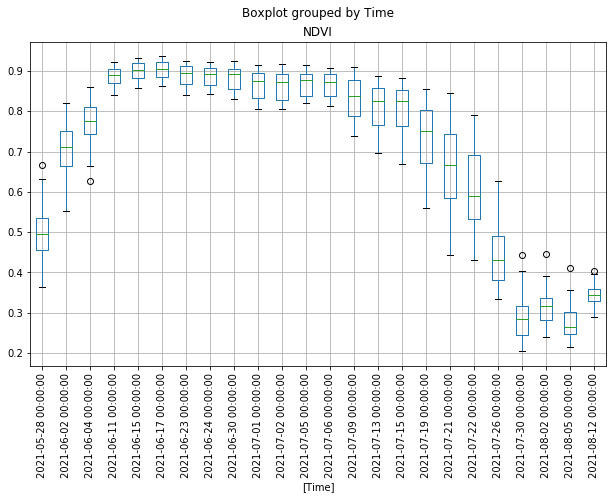

In [193]:
all_dates_MEDIAN[['Time','NDVI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

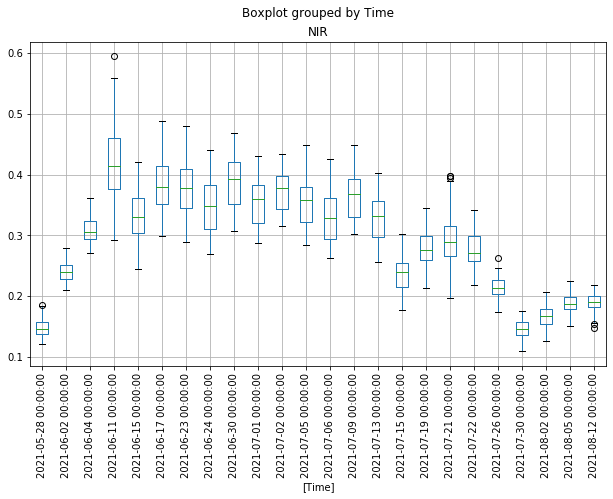

In [194]:
all_dates_MEDIAN[['Time','NIR']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

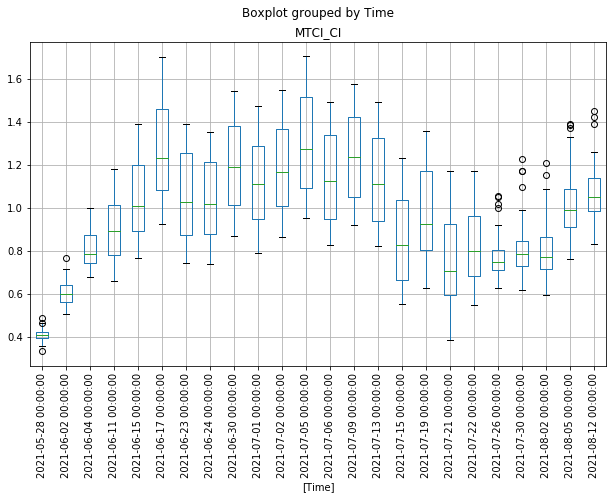

In [195]:
all_dates_MEDIAN[['Time','MTCI_CI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

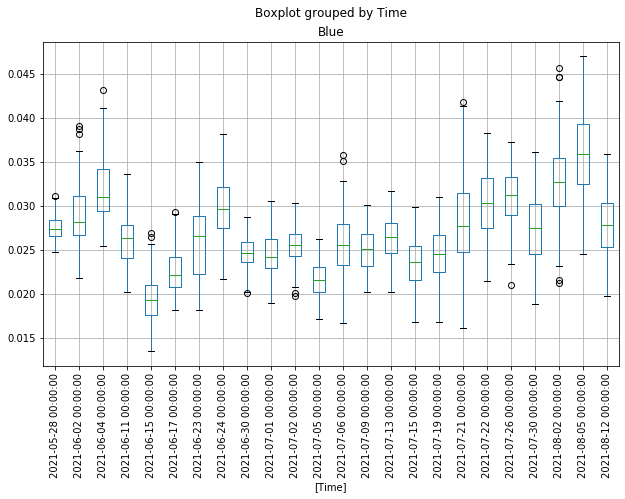

In [196]:
all_dates_MEDIAN[['Time','Blue']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

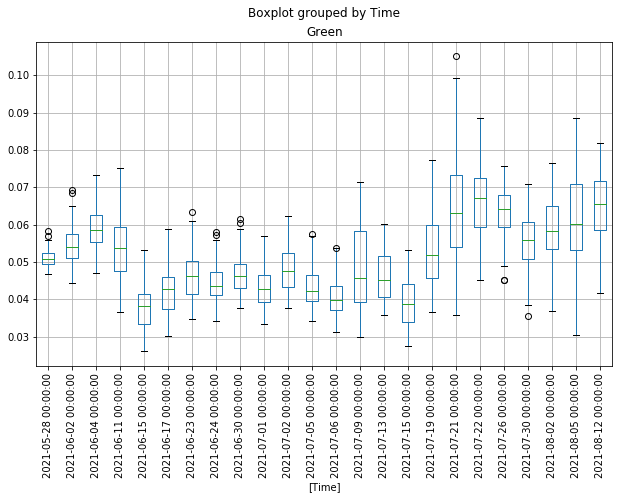

In [197]:
all_dates_MEDIAN[['Time','Green']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

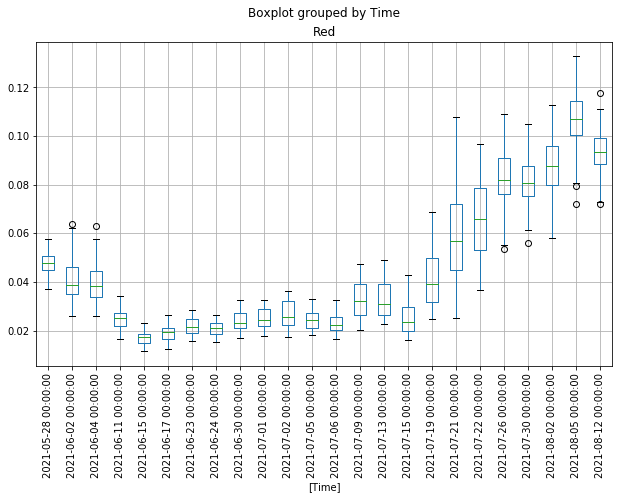

In [198]:
all_dates_MEDIAN[['Time','Red']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

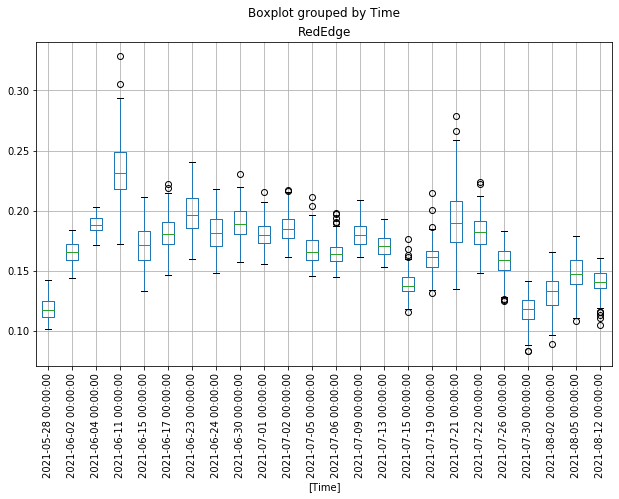

In [199]:
all_dates_MEDIAN[['Time','RedEdge']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

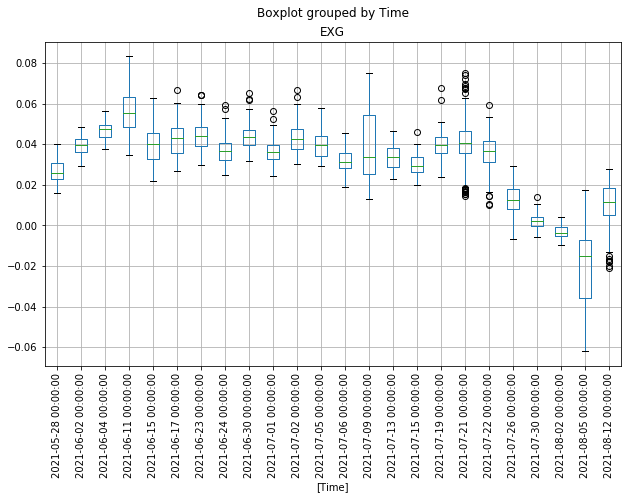

In [200]:
all_dates_MEDIAN[['Time','EXG']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Text xticklabel objects>)

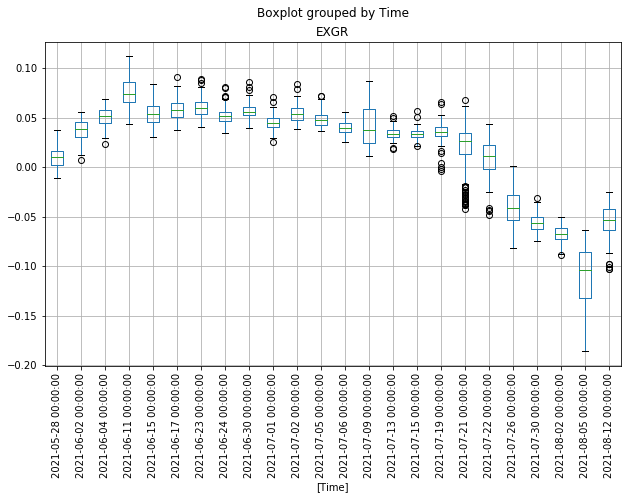

In [201]:
all_dates_MEDIAN[['Time','EXGR']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [202]:
Df=pd.read_excel('{}_P4M_2021_all_dates_MEDIAN.xlsx'.format(field))